# Caudales Albujón

In [1]:
import getpass
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import pandas as pd
import pandas.io.sql as psql

In [2]:
%matplotlib widget

## Figure parameters

In [3]:
# graphs size
# default size 6.4 * 4.8
default_ratio = 6.4/4.8
print('defult ratio', 6.4/default_ratio)
x_cm = 11
x_in = x_cm / 2.54
y_in = x_in / default_ratio
print('x in', x_in)

defult ratio 4.8
x in 4.330708661417323


In [4]:
plt.rc('figure', figsize=(x_in, y_in))
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize= 9, grid=True)
plt.rc('axes.spines', right=False, top=False)
plt.rc('xtick', direction='out', top=False)
plt.rc('ytick', direction='out', right=False)
plt.rc('lines', linewidth=0.8, linestyle='-', marker='.', markersize=4)
plt.rc('legend', fontsize=8, framealpha=0.5, loc='best')

plt.subplots_adjust(hspace=0.1, bottom=0.16, top=0.87)
plt.close()
# mpl.rcdefaults()

# plt.figure(dpi=80)

## Database

In [5]:
db = getpass.getpass('DB: ')
user = getpass.getpass('User: ')
passw = getpass.getpass('Password: ')

DB:  ···
User:  ········
Password:  ··


In [6]:
con = psycopg2.connect(database=db, user=user, password=passw)

## Functions

## Data

### Desembocadura Albujón

In [12]:
# desembocadura albujón
select = \
"""
select t.fecha::date fecha, (avg(t.v)) q
from saih.tsh t 
where id = '06a18' and t.var='q01'
group by t.fecha::date
order by t.fecha::date
"""
alb18 = psql.read_sql(select, con)

### Piezometros

In [46]:
import collections

select = \
"""
select t1.id
from saih.puntos t1 
	join saih.tsd t2 using(id)
where var = 'e10'
group by t1.id
"""
piezos = psql.read_sql(select, con)
piezos = piezos['id'].to_numpy()
dpzs = [(piez1, '') for piez1 in piezos]
dpzs = dict(dpiezos)
dpzs = collections.OrderedDict(sorted(dpzs.items()))
dpzs.keys()

odict_keys(['06z01', '06z02', '06z03', '06z05', '06z06', '06z07', '06z08', '06z09', '06z10', '06z11', '06z12', '06z13', '06z14', '06z15', '06z16', '06z17', '06z18', '06z19', '06z20'])

In [25]:
for piez1 in dpzs.keys():
    select = \
    """
    select t.fecha , t.v 
    from saih.tsd t 
    where t.id = %s and t.var = 'e10' 
    order by t.fecha
    """
    dpzs[piez1] = psql.read_sql(select, con, params=(piez1,))
    if len(dpzs[piez1]) == 0:
        raise ValueError(f'el piezómetro {piez1} no tiene datos')


In [42]:
dpzs['06z01'].head()

,fecha,v
0,2019-12-12,3.542
1,2019-12-13,3.541
2,2019-12-14,3.541
3,2019-12-15,3.546
4,2019-12-16,3.554


## Figures with several subplots

### figure serie Albujón con pluviómetros La Puebla y El Estrecho

In [51]:
# I modify figure size
x2_cm = 12
x2_in = x2_cm / 2.54
y2_in = 12.6 
print('x2 in:', x2_in, 'y2_in:', y2_in)

x2 in: 4.724409448818897 y2_in: 12.6


In [61]:
plt.rc('figure', figsize=(x2_in, y2_in))
plt.rc('font', size=6)
plt.rc('axes', labelsize=6, titlesize= 7, grid=True)
plt.rc('axes.spines', right=False, top=False)
plt.rc('xtick', direction='out', top=False)
plt.rc('ytick', direction='out', right=False)
plt.rc('lines', linewidth=0.7, linestyle='-', marker='.', markersize=4)
plt.rc('legend', fontsize=7, framealpha=0.5, loc='best')

plt.subplots_adjust(hspace=0.05, bottom=0.16, top=0.87)
plt.close()


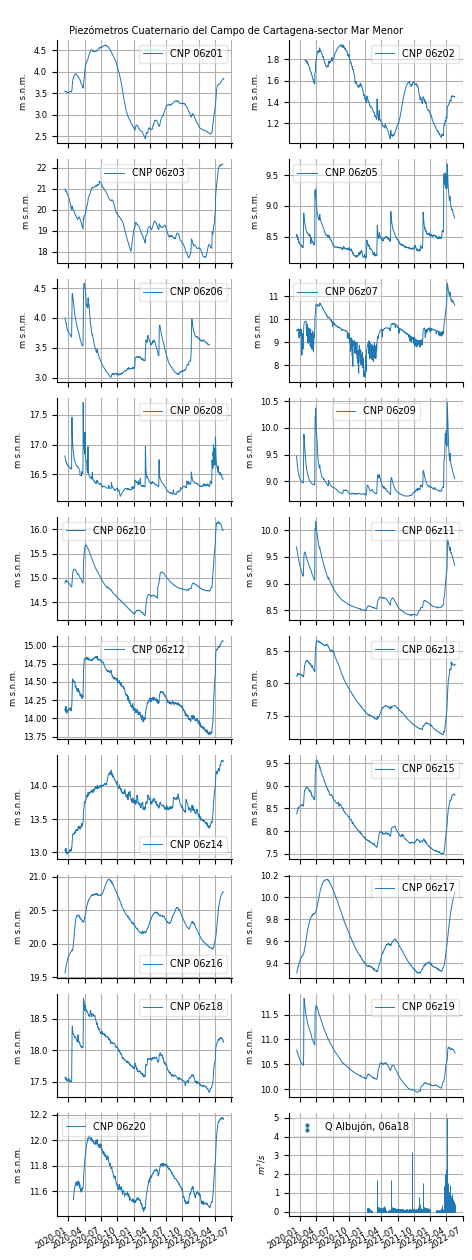

In [63]:
plt.close()
fig, axs = plt.subplots(10, 2, sharex=True)
fig.autofmt_xdate()
fig.suptitle('Piezómetros Cuaternario del Campo de Cartagena-sector Mar Menor\n', fontsize=7)

ir = -1
ic = 0
j = 1
for key, df in dpzs.items():
    if j == 1:
        ir += 1
        ic = 0
        j = 2
    else:
        ic = 1
        j = 1
    
    axs[ir, ic].plot(df['fecha'], df['v'], marker=' ', label=f"CNP {key}")
    axs[ir, ic].legend()
    axs[ir, ic].set(ylabel='m s.n.m.')

axs[9, 1].stem(alb18['fecha'], alb18['q'], markerfmt=' ', basefmt=' ', label="Q Albujón, 06a18")
axs[9, 1].legend()
axs[9, 1].set(ylabel='$ m^3 / s $')

    
plt.tight_layout()
plt.show()

In [78]:
plt.close()